In [3]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [4]:
!ls "/content/gdrive/My Drive/Gemastik"

Data.zip  images.zip  metadata1.csv  metadata.csv


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
!unzip '/content/gdrive/My Drive/Gemastik/images.zip'

Archive:  /content/gdrive/My Drive/Gemastik/images.zip
   creating: images/
  inflating: images/000001-1.jpg     
  inflating: images/000001-1.png     
  inflating: images/000001-10.jpg    
  inflating: images/000001-11.jpg    
  inflating: images/000001-12.jpg    
  inflating: images/000001-13.jpg    
  inflating: images/000001-14.jpg    
  inflating: images/000001-15.jpg    
  inflating: images/000001-17.jpg    
  inflating: images/000001-18.jpg    
  inflating: images/000001-19.jpg    
  inflating: images/000001-2.jpg     
  inflating: images/000001-20.jpg    
  inflating: images/000001-24.jpg    
  inflating: images/000001-27.jpg    
  inflating: images/000001-3.jpg     
  inflating: images/000001-3.png     
  inflating: images/000001-4.jpg     
  inflating: images/000001-4.png     
  inflating: images/000001-5.png     
  inflating: images/000001-6.jpg     
  inflating: images/000001-6.png     
  inflating: images/000001-7.jpg     
  inflating: images/000001-8.jpg     
  inflating:

In [7]:
df = pd.read_csv(os.path.join('/content/gdrive/My Drive/Gemastik/metadata1.csv'))

In [8]:
df['path'] = df['filename'].map(lambda x: os.path.join('images',format(x)))

In [9]:
df.sample(20)

,patientid,offset,sex,age,Name,finding,filename,path
430,295,NaN,NaN,NaN,COVID-19,COVID-19,11547_2020_1200_Fig2_HTML-a.png,images/11547_2020_1200_Fig2_HTML-a.png
653,423a,0.0,NaN,NaN,Non-Covid-19,MERS-CoV,MERS-CoV-1-s2.0-S0378603X1500248X-gr4e.jpg,images/MERS-CoV-1-s2.0-S0378603X1500248X-gr4e.jpg
508,337,2.0,M,80.0,COVID-19,COVID-19,article_river_de7471906e0011eabe5f9363acaf45c4...,images/article_river_de7471906e0011eabe5f9363a...
256,185,7.0,F,78.0,COVID-19,COVID-19,ajr.20.23034.pdf-003.png,images/ajr.20.23034.pdf-003.png
13,7,12.0,F,29.0,Non-Covid-19,SARS,SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day...,images/SARS-10.1148rg.242035193-g04mr34g04b-Fi...
189,142,7.0,M,65.0,COVID-19,COVID-19,post-intubuation-pneumomediastium-and-pneumoth...,images/post-intubuation-pneumomediastium-and-p...
350,249,43.0,M,NaN,COVID-19,COVID-19,24035bda.jpg,images/24035bda.jpg
27,15,0.0,M,NaN,COVID-19,COVID-19,ryct.2020200034.fig5-day0.jpeg,images/ryct.2020200034.fig5-day0.jpeg
115,81,7.0,M,44.0,COVID-19,COVID-19,figure1-5e71be566aa8714a04de3386-98-left.jpeg,images/figure1-5e71be566aa8714a04de3386-98-lef...
188,142,6.0,M,65.0,COVID-19,COVID-19,post-intubuation-pneumomediastium-and-pneumoth...,images/post-intubuation-pneumomediastium-and-p...


In [10]:
df['Name_id'] = pd.Categorical(df['Name']).codes
df.head()

,patientid,offset,sex,age,Name,finding,filename,path,Name_id
0,2,0.0,M,65.0,COVID-19,COVID-19,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,images/auntminnie-a-2020_01_28_23_51_6665_2020...,0
1,2,3.0,M,65.0,COVID-19,COVID-19,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,images/auntminnie-b-2020_01_28_23_51_6665_2020...,0
2,2,5.0,M,65.0,COVID-19,COVID-19,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,images/auntminnie-c-2020_01_28_23_51_6665_2020...,0
3,2,6.0,M,65.0,COVID-19,COVID-19,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,images/auntminnie-d-2020_01_28_23_51_6665_2020...,0
4,4,0.0,F,52.0,COVID-19,COVID-19,nejmc2001573_f1a.jpeg,images/nejmc2001573_f1a.jpeg,0


In [11]:
from PIL import Image
df['image'] = df['path'].map(lambda x: np.asarray(Image.open(x).resize((224,224))))
df

,patientid,offset,sex,age,Name,finding,filename,path,Name_id,image
0,2,0.0,M,65.0,COVID-19,COVID-19,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,images/auntminnie-a-2020_01_28_23_51_6665_2020...,0,"[[[253, 253, 253], [194, 194, 193], [179, 179,..."
1,2,3.0,M,65.0,COVID-19,COVID-19,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,images/auntminnie-b-2020_01_28_23_51_6665_2020...,0,"[[[206, 206, 205], [206, 206, 205], [206, 206,..."
2,2,5.0,M,65.0,COVID-19,COVID-19,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,images/auntminnie-c-2020_01_28_23_51_6665_2020...,0,"[[[227, 227, 227], [186, 186, 184], [189, 189,..."
3,2,6.0,M,65.0,COVID-19,COVID-19,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,images/auntminnie-d-2020_01_28_23_51_6665_2020...,0,"[[[210, 210, 208], [211, 211, 208], [211, 211,..."
4,4,0.0,F,52.0,COVID-19,COVID-19,nejmc2001573_f1a.jpeg,images/nejmc2001573_f1a.jpeg,0,"[[[67, 68, 70], [68, 69, 71], [68, 69, 71], [6..."
...,...,...,...,...,...,...,...,...,...,...
736,448,3.0,M,NaN,COVID-19,COVID-19,8781ac6b9589f3646d2bbfff8f9015_jumbo.jpeg,images/8781ac6b9589f3646d2bbfff8f9015_jumbo.jpeg,0,"[[82, 83, 85, 86, 90, 95, 98, 99, 94, 102, 105..."
737,449,NaN,M,NaN,Non-Covid-19,Tuberculosis,7185bd4a8cc3280902117d034c7653_jumbo.jpg,images/7185bd4a8cc3280902117d034c7653_jumbo.jpg,1,"[[[1, 1, 1], [1, 1, 1], [0, 0, 0], [1, 1, 1], ..."
738,450,NaN,F,62.0,Non-Covid-19,Klebsiella,4c8dee3d9fe81567b98ed1b0b2b4c6_jumbo.JPG,images/4c8dee3d9fe81567b98ed1b0b2b4c6_jumbo.JPG,1,"[[[3, 3, 3], [5, 5, 5], [29, 29, 29], [32, 32,..."
739,451,14.0,M,18.0,Non-Covid-19,Eosinophilic pneumonia,75fb7cd80d5ca4074c474f93471ad4_jumbo.jpeg,images/75fb7cd80d5ca4074c474f93471ad4_jumbo.jpeg,1,"[[21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, ..."


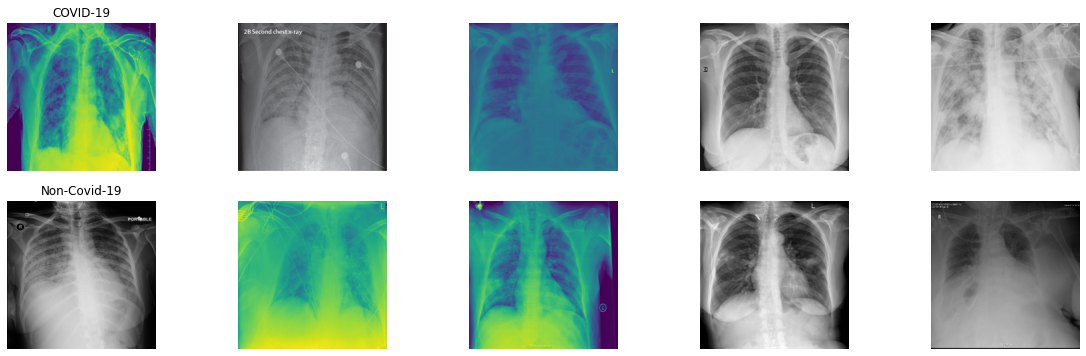

In [12]:
n_samples=5
fig, m_axs = plt.subplots(2, n_samples, figsize = (4*n_samples, 3*2))
for n_axs, (type_name, type_rows) in zip(m_axs,df.sort_values(['Name']).groupby('Name')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=2018).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

In [13]:
df['image'].map(lambda x: x.shape).value_counts()

(224, 224, 3)    377
(224, 224)       260
(224, 224, 4)    104
Name: image, dtype: int64

In [14]:
df2=df[df['image'].map(lambda x: x.shape)==(224,224,3)]

In [15]:
X = df2["image"]
Y = df2["Name_id"]


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 999)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.165, random_state = 999)

In [17]:
print("Training images: {}".format(X_train.shape[0]))
print("Validation images: {}".format(X_val.shape[0]))
print("Testing images: {}".format(X_test.shape[0]))

Training images: 283
Validation images: 56
Testing images: 38


In [18]:

l = ["train","val","test"]

for x in l:
    globals()["X_{}".format(x)] = np.asarray(globals()["X_{}".format(x)].tolist())
    globals()["X_{}_mean".format(x)] = np.mean(globals()["X_{}".format(x)])
    globals()["X_{}_std".format(x)] = np.std(globals()["X_{}".format(x)])
    globals()["X_{}".format(x)] = (globals()["X_{}".format(x)]-globals()["X_{}_mean".format(x)])/globals()["X_{}_std".format(x)]

In [19]:
from tensorflow.keras.utils import to_categorical,normalize
# Perform one-hot encoding on the labels
y_train = to_categorical(y_train, num_classes = 2)
y_test = to_categorical(y_test, num_classes = 2)
y_val = to_categorical(y_val, num_classes = 2)

In [20]:
X_train = X_train.reshape(X_train.shape[0], *(224, 224, 3))
X_test = X_test.reshape(X_test.shape[0], *(224, 224, 3))
X_val = X_val.reshape(X_val.shape[0], *(224, 224, 3))

In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
from  tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input

In [27]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
num_class = 2

model = Sequential([MobileNet(include_top=False,
                             weights='imagenet',
                             pooling='avg'),
                    Dense(num_class, activation='sigmoid')])

model.layers[0].trainable = False

17227776/17225924 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.optimizers import SGD

In [ ]:

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (224,224,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(2, activation= 'sigmoid')
])

In [28]:

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [29]:

data_generator=ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True,
                               vertical_flip=True,
                               fill_mode='nearest')


In [30]:
data_generator.fit(X_train)

In [31]:
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath = 'modelb.h5', verbose = 1, save_best_only = True)

history = model.fit(X_train,y_train,
        batch_size = 32,
        epochs=25,
        validation_data=(X_val, y_val),
        callbacks = [checkpointer],
        verbose=2, shuffle=True)

Epoch 1/25

Epoch 00001: val_loss improved from inf to 0.69462, saving model to modelb.h5
9/9 - 1s - loss: 0.6510 - accuracy: 0.6961 - val_loss: 0.6946 - val_accuracy: 0.6964
Epoch 2/25

Epoch 00002: val_loss improved from 0.69462 to 0.62665, saving model to modelb.h5
9/9 - 0s - loss: 0.5718 - accuracy: 0.7279 - val_loss: 0.6267 - val_accuracy: 0.6786
Epoch 3/25

Epoch 00003: val_loss improved from 0.62665 to 0.61599, saving model to modelb.h5
9/9 - 0s - loss: 0.5479 - accuracy: 0.7244 - val_loss: 0.6160 - val_accuracy: 0.6964
Epoch 4/25

Epoch 00004: val_loss improved from 0.61599 to 0.61499, saving model to modelb.h5
9/9 - 0s - loss: 0.5170 - accuracy: 0.7633 - val_loss: 0.6150 - val_accuracy: 0.6786
Epoch 5/25

Epoch 00005: val_loss improved from 0.61499 to 0.60169, saving model to modelb.h5
9/9 - 0s - loss: 0.4867 - accuracy: 0.7774 - val_loss: 0.6017 - val_accuracy: 0.6786
Epoch 6/25

Epoch 00006: val_loss improved from 0.60169 to 0.59873, saving model to modelb.h5
9/9 - 0s - loss

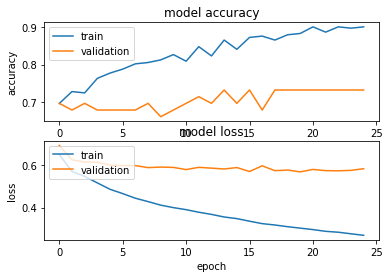

In [32]:
plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'validation'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'validation'], loc='upper left')  
plt.show()